CryptoPanic:

title: Argentina president Javier Milei claims LIBRA memecoin fallout is ‘a private matter’
Content: Argentina’s President Javier Milei has denied endorsing the controversial LIBRA memecoin, a project that triggered massive investor losses. In a Feb. 17 interview, Milei addressed the situation, stating that he did not actively promote the token but merely shared information about it. He maintained that he acted in good faith and had nothing to hide. […] The post Argentina president Javier...
Publish Date: 2025-02-18T09:11:20Z
Currencies: SOL, LIBRA

www.coindesk.com:

title: Argentina Opposition Threatens Milei With Impeachment Over LIBRA Token Tweet: Reuters
link: https://www.coindesk.com/policy
description: An opposition lawmaker said the president should be impeached after promoting and then withdrawing his support for the token.
time: 1 MIN. AGO

www.binance.com

Time: 6h
Article Title: Tyr Capital CIO Predicts Potential ETH Price Reversal
According to Odaily, Ed Hindi, the Chief Investment Officer of Tyr Capital, has indicated that Ethereum (ETH) is currently experiencing 'peak bearishness.' He suggests that this could lead to a price reversal, potentially driving the value up to $4,000.
Trading Pair: ETH
Price Change: +0.09%

Importing All the news data:

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
# Function to process the first file (type 1)
def process_file1(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        data = file.read().strip().split("==================================================")

    extracted_data = []
    for entry in data:
        title_match = re.search(r"title:\s*(.+)", entry)
        content_match = re.search(r"Content:\s*(.+)", entry, re.DOTALL)
        time_match = re.search(r"Publish Date:\s*(.+)", entry)
        currencies_match = re.search(r"Currencies:\s*(.+)", entry)

        title = title_match.group(1).strip() if title_match else None
        content = content_match.group(1).strip() if content_match else None
        time = time_match.group(1).strip() if time_match else None
        trading_pair_or_currencies = currencies_match.group(1).strip() if currencies_match else "N/A"

        extracted_data.append([title, content, time, trading_pair_or_currencies, "N/A"])

    return extracted_data


# Function to process the second file (type 2)
def process_file2(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        data = file.read().strip().split("==================================================")

    extracted_data = []
    for entry in data:
        title_match = re.search(r"title:\s*(.+)", entry)
        content_match = re.search(r"description:\s*(.+)", entry, re.DOTALL)
        time_match = re.search(r"time:\s*(.+)", entry)

        title = title_match.group(1).strip() if title_match else None
        content = content_match.group(1).strip() if content_match else None
        time = time_match.group(1).strip() if time_match else None

        extracted_data.append([title, content, time, "N/A", "N/A"])

    return extracted_data


# Function to process the third file (type 3)
def process_file3(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        data = file.read().strip().split("==================================================")

    extracted_data = []
    for entry in data:
        time_match = re.search(r"Time:\s*(.+)", entry)
        title_match = re.search(r"Article Title:\s*(.+)", entry)
        content_match = re.search(r"According to (.+)", entry, re.DOTALL)
        trading_pair_match = re.search(r"Trading Pair:\s*(.+)", entry)
        price_change_match = re.search(r"Price Change:\s*(.+)", entry)

        time = time_match.group(1).strip() if time_match else None
        title = title_match.group(1).strip() if title_match else None
        content = content_match.group(1).strip() if content_match else None
        trading_pair_or_currencies = trading_pair_match.group(1).strip() if trading_pair_match else "N/A"
        price_change = price_change_match.group(1).strip() if price_change_match else "N/A"

        extracted_data.append([title, content, time, trading_pair_or_currencies, price_change])

    return extracted_data


# Read and process all files
file1_data = process_file1("cryptopanic.txt")
file2_data = process_file2("res.txt")
file3_data = process_file3("scraped_data_clean.txt")

# Combine all data into a single DataFrame
columns = ["title", "content", "time", "trading_pair_or_currencies", "price_change"]
df = pd.DataFrame(file1_data + file2_data + file3_data, columns=columns)


merging into a dataframe:

In [2]:
df

,title,content,time,trading_pair_or_currencies,price_change
0,Argentina president Javier Milei claims LIBRA ...,Argentina’s President Javier Milei has denied ...,2025-02-18T09:11:20Z,"SOL, LIBRA",N/A
1,Michael Saylor on Elon Musk's Acute Post: 'Bit...,Vocal Bitcoiner Saylor has proposed a BTC solu...,2025-02-18T09:07:00Z,"BTC, G, BTC, O",N/A
2,$TRUMP Memecoin Airdrop: $50 Bonus for Trump M...,This initiative rewards customers who purchase...,2025-02-18T08:53:26Z,"TRUMP, MEME, TRUMP, TRUMP",N/A
3,Standard Chartered to Launch a Stablecoin Pegg...,Standard Chartered Bank (Hong Kong) Limited (S...,2025-02-18T08:48:09Z,None,N/A
4,Monad to roll out a public testnet on Feb. 19,"Monad's testnet, in development for two years,...",2025-02-18T08:45:35Z,None,N/A
...,...,...,...,...,...
46300,"Bitcoin (BTC) Drops Below 96,000 USDT with a 1...","Binance Market Data, Bitcoin (BTC) dropped bel...",Feb 11,BTC,-0.94%
46301,Bitcoin Exchange Reserves Hit Three-Year Low A...,"BlockBeats, data from CryptoQuant reveals that...",Feb 11,BTC,-0.94%
46302,Cryptocurrency Market Sees $170 Million in Liq...,"PANews, data from Coinglass reveals that the c...",Feb 11,BTC,-0.94%
46303,Cryptocurrency Market Cap Rises Despite Slowed...,"BlockBeats, on February 11, JPMorgan reported ...",Feb 11,BTC,-0.94%


In [3]:
df.to_csv('data.csv', index=False)

Exploratory Data Analysis:

In [3]:
df['trading_pair_or_currencies'].value_counts()

trading_pair_or_currencies
N/A                                           17284
BTC                                           10623
BNB                                            6627
ETH                                            2505
SOL                                            2206
                                              ...  
AAVE, $1                                          1
M3M3                                              1
BTC, USDT, USDT, USDT, BTC, USDT, 00, USDT        1
BTC, USDT, BTC, X                                 1
BTC, ETH, XRP, 00                                 1
Name: count, Length: 111, dtype: int64

In [4]:
df['time'].value_counts()

time
Feb 14                  5784
Feb 12                  5338
Feb 11                  4666
Feb 13                  4636
Feb 10                  3475
                        ... 
2025-02-18T02:06:09Z       1
2025-02-18T02:02:00Z       1
2025-02-18T02:00:00Z       1
2025-02-18T01:54:03Z       1
14h                        1
Name: count, Length: 335, dtype: int64

In [5]:
df['price_change'].value_counts()

price_change
N/A        19188
-0.23%       187
-0.24%       183
-0.22%       182
-0.38%       181
           ...  
-5.01%         1
-13.09%        1
-10.56%        1
-13.02%        1
-4.05%         1
Name: count, Length: 1239, dtype: int64

In [6]:
content=df['content']

In [7]:
content

0        Argentina’s President Javier Milei has denied ...
1        Vocal Bitcoiner Saylor has proposed a BTC solu...
2        This initiative rewards customers who purchase...
3        Standard Chartered Bank (Hong Kong) Limited (S...
4        Monad's testnet, in development for two years,...
                               ...                        
46300    Binance Market Data, Bitcoin (BTC) dropped bel...
46301    BlockBeats, data from CryptoQuant reveals that...
46302    PANews, data from Coinglass reveals that the c...
46303    BlockBeats, on February 11, JPMorgan reported ...
46304    Odaily, Tether has chosen Arbitrum as the infr...
Name: content, Length: 46305, dtype: object

Sentimental Analysis of content:

In [ ]:
from textblob import TextBlob
def classify_sentiment(text):
    if pd.isna(text) or text.strip() == "":
        return "Neutral"  # Handle empty values

    sentiment_score = TextBlob(text).sentiment.polarity
    return "Positive" if sentiment_score > 0 else "Negative"

# Apply function to classify sentiment and append to DataFrame
df["sentiment"] = df["content"].apply(classify_sentiment)

In [ ]:
df["sentiment"].value_counts()

sentiment
Negative    24364
Positive    20228
Neutral      1713
Name: count, dtype: int64

Tokenizing Data And WordCloud:

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
def preprocess_text(text):
    if pd.isna(text):  # Handle missing values
        return ""
    
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    #text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = word_tokenize(text.lower())  # Tokenization & lowercasing
    stop_words = set(stopwords.words("english"))
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    return " ".join(tokens)

# Apply preprocessing to df["content"]
df["cleaned_content"] = df["content"].apply(preprocess_text)

In [31]:
cleaned_text=""
cleaned_text = " ".join(df["cleaned_content"].dropna())

Total Words: 2334252
Unique Words: 9635


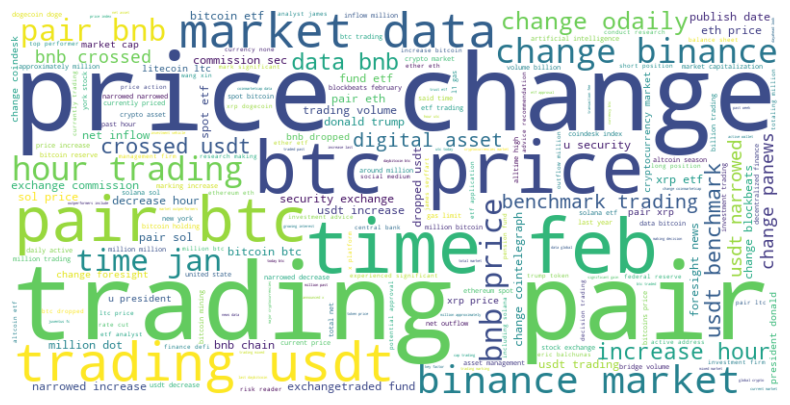

In [32]:
from wordcloud import WordCloud

print("Total Words:", len(cleaned_text.split()))
print("Unique Words:", len(set(cleaned_text.split())))
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(cleaned_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()